In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

In [4]:
#데이터 다운로드
# !curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

'unzip'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [2]:
import os

skip_num = 0 
for folder_name in ('Cat', 'Dog'): #가장 큰 파일에 접근할 수 있도록 반복문
    folder_path = os.path.join('PetImages',folder_name) #PetImages 접근
    for name in os.listdir(folder_path): # cat, dog 접근
        fpath = os.path.join(folder_path,name) #그 안에 사진 접근
        try:
            pet_picture = open(fpath, 'rb')
            pic_data_check = tf.compat.as_bytes('JFIF') in pet_picture.peek(10)
        finally:
            pet_picture.close()
        
        if not pic_data_check: #데이터가 고장나있으면
            skip_num +=1 #숫자 체크하고
            os.remove(fpath) #지워라

print(skip_num)

0


In [3]:
img_size = (180,180)
batch_size = 64


#데이터 생성
train_set = keras.preprocessing.image_dataset_from_directory(
    'PetImages',
    validation_split=0.2,
    subset='training',
    seed = 100,
    image_size=img_size,
    batch_size = batch_size
)
val_set = keras.preprocessing.image_dataset_from_directory(
    'PetImages',
    validation_split=0.2,
    subset='validation',
    seed = 100,
    image_size=img_size,
    batch_size = batch_size,
)

Found 23422 files belonging to 2 classes.
Using 18738 files for training.
Found 23422 files belonging to 2 classes.
Using 4684 files for validation.


In [4]:
import matplotlib.pyplot as plt

for image, labels in train_set.take(1):
    print(image[0].shape)

(180, 180, 3)


In [5]:
data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
])

In [25]:
# input_shape = (180, 180, 3)

def make_model(input_shape, num_classes):
    inputs = keras.Input(shape = input_shape)
    x = data_augmentation(inputs)
    x = layers.Conv2D(32, kernel_size = (3,3), padding = 'same', activation = 'relu')(x)
    x = layers.MaxPool2D(pool_size = (2,2))(x)
    x = layers.Conv2D(64, kernel_size = (3,3),  padding = 'same',  activation = 'relu')(x)
    x = layers.MaxPool2D(pool_size = (2,2))(x)
    x = layers.Conv2D(128, kernel_size = (3,3),  padding = 'same',  activation = 'relu')(x)
    x = layers.MaxPool2D(pool_size = (2,2))(x)
    x = layers.Flatten()(x)
    x = layers.Dropout(0.5)(x)
    output = layers.Dense(1, activation = 'relu')(x)
    return keras.Model(inputs,output)

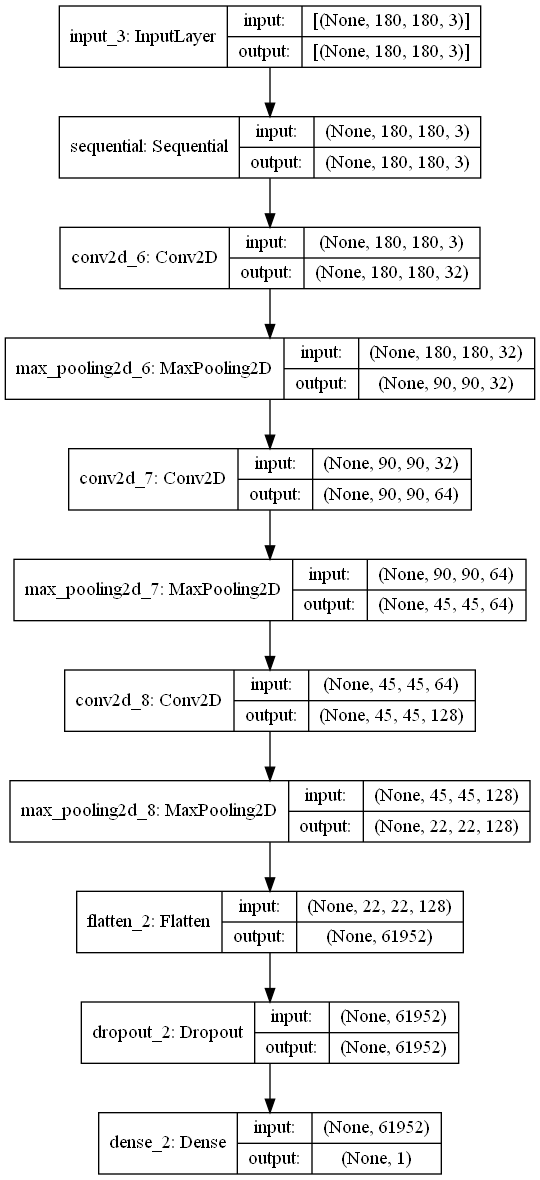

In [26]:
model = make_model(input_shape = (180,180,3), num_classes=2)
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
batch_size = 64 
epochs = 10

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model.fit(train_set, batch_size=batch_size, epochs=epochs, validation_data=val_set)

Epoch 1/10
293/293 [==============================] - 433s 1s/step - loss: 7.6333 - accuracy: 0.4993 - val_loss: 7.7158 - val_accuracy: 0.4940
Epoch 2/10
293/293 [==============================] - 434s 1s/step - loss: 7.6319 - accuracy: 0.4995 - val_loss: 7.7158 - val_accuracy: 0.4940
Epoch 3/10
293/293 [==============================] - 448s 2s/step - loss: 7.6319 - accuracy: 0.4995 - val_loss: 7.7158 - val_accuracy: 0.4940
Epoch 4/10
208/293 [====================>.........] - ETA: 2:04 - loss: 7.6361 - accuracy: 0.4992

In [20]:
img = keras.preprocessing.image.load_img('PetImages/Cat/6300.jpg', target_size=(180,180)) #image_size = 변수화

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = predictions[0]

print('이 사진은 개일 확률이 %.2f이고, 고양이일 확률이 %.2f입니다'% (score, 100 - score))


이 사진은 개일 확률이 0.07이고, 고양이일 확률이 99.93입니다


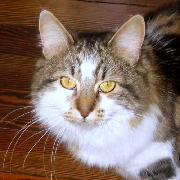

In [21]:
img